Collatz alpha experiments

In [173]:
"""
This experimental notebook analyses alphas (number of divisions by two) 
of randomly generated Collatz sequences.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 100001
K_FACTOR = 1
MAX_ITERATIONS = 100
LOG_MODE = None
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Drop last row if sequences has ended with 1
if len(analysis_frame) > 1:
    analysis_frame = analysis_frame[:-1]

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame["beta"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"]) 

analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha_i_max"] = (analysis_frame["collatz"] * K_FACTOR + 1).apply(log2)
analysis_frame["alpha_i_max"] = log2(K_FACTOR) + analysis_frame["collatz"].apply(log2)
analysis_frame["alpha_i_max"] = analysis_frame["alpha_i_max"].astype("int64") + 1
analysis_frame["alpha_sum"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_pred"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)

# Possibly set log mode
if LOG_MODE:
    analysis_frame["v1"] = analysis_frame["v1"].apply(LOG_MODE)
    analysis_frame["collatz"] = analysis_frame["collatz"].apply(LOG_MODE)
    analysis_frame["next_odd"] = analysis_frame["next_odd"].apply(LOG_MODE)
    
# Validate alpha max & alpha pred
final_alpha = analysis_frame["alpha_sum"].max()
final_alpha_max = analysis_frame["alpha_max"].max()

alpha_max_valid = final_alpha == final_alpha_max
alpha_i_max_valid = int((analysis_frame["alpha_i"] <= analysis_frame["alpha_i_max"]).sum())

alphas_valid = alpha_max_valid and alpha_i_max_valid

# Print results
print_frame = analysis_frame[[
    "n", "v1", "collatz", "next_odd",
    "alpha_i", "alpha_i_max", "alpha_sum", "alpha_pred", 
    "alpha_max", "bin_str"]]

print_frame.columns = [
    "n","v1", "vi", "vi+1",
    "a_i", "a_i_max", "a_sum", "a_pred", "a_max",
    "bin_str"]

# print_frame = print_frame.sort_values(by=['vi'])
print_frame = print_frame.reset_index(drop=True)

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
       "Alphas valid:", alpha_max_valid, "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 78555  K: 1 Alphas valid: True 

 n     v1     vi   vi+1  a_i  a_i_max  a_sum  a_pred  a_max            bin_str
 1  78555  78555  19639    2       17      2       1     17  10011001011011011
 2  78555  19639   2455    3       15      5       1     17    100110010110111
 3  78555   2455    307    3       12      8       1     17       100110010111
 4  78555    307     77    2        9     10       1     17          100110011
 5  78555     77     39    1        7     11       1     17            1001101
 6  78555     39      5    3        6     14       1     17             100111
 7  78555      5      3    1        3     15       1     17                101
 8  78555      3      1    2        2     17       1     17                 11 



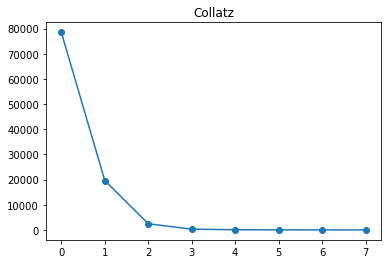

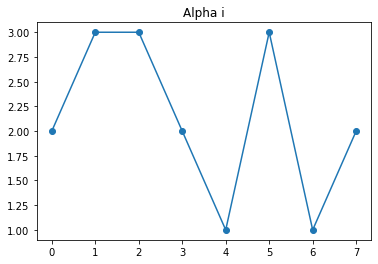

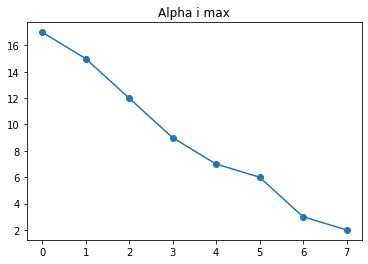

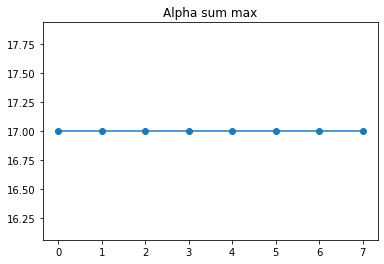

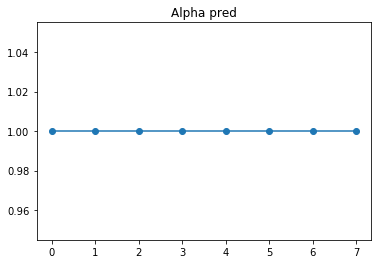

In [174]:
# Plot results
plt.figure()
plt.title("Collatz")
plt.plot(print_frame["vi"],  "o-")


plt.figure()
plt.title("Alpha i")
plt.plot(print_frame["a_i"],  "o-")

plt.figure()
plt.title("Alpha i max")
plt.plot(print_frame["a_i_max"],  "o-")

plt.figure()
plt.title("Alpha sum max")
plt.plot(print_frame["a_max"],  "o-")

plt.figure()
plt.title("Alpha pred")
plt.plot(print_frame["a_pred"],  "o-")